In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '99ce65e9-8b3c-4708-b932-83dd2d19a601',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


#NOTE:
#I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the Anaconda prompt

{'status': {'timestamp': '2025-08-13T09:12:43.472Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9463}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12280, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12280,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.990528e+07,1.990528e+07,False,NaN,1,NaN,NaN,None,2025-08-13T09:10:00.000Z,119976.266125,7.510712e+10,1.2959,0.272122,1.106923,5.276401,-2.009365,14.182590,17.538621,2.388161e+12,58.4983,2.519502e+12,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
1,1027,Ethereum,ETH,ethereum,10437,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207086e+08,1.207086e+08,True,NaN,2,NaN,NaN,None,2025-08-13T09:11:00.000Z,4631.943881,6.461700e+10,45.6035,-0.018303,7.731336,27.888886,51.989544,82.976222,81.192282,5.591154e+11,13.6956,5.591154e+11,None,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,None,2025-08-13T09:11:00.000Z,3.290401,8.960417e+09,5.1085,1.605344,4.764865,12.317103,10.370521,51.494771,32.152141,1.951484e+11,4.7802,3.290401e+11,None,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
3,825,Tether USDt,USDT,tether,141173,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.650245e+11,1.677492e+11,True,NaN,4,NaN,NaN,None,2025-08-13T09:10:00.000Z,0.999890,1.616389e+11,22.9327,0.001300,-0.012121,-0.003315,-0.037806,-0.066799,-0.018346,1.650063e+11,4.0419,1.677307e+11,None,2025-08-13T09:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-13 14:43:26.722296
4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392878e+08,1.392878e+08,False,NaN,5,NaN,NaN,None,2025-08-13T09:10:00.000Z,852.731684,3.268198e+09,22.8414,0.850871,6.035226,12.262616,20.866110,31.059163,31.029800,1.187752e+11,2.9094,1.187752e+11,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
5,5426,Solana,SOL,solana,968,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.396646e+08,6.073311e+08,True,NaN,6,5.252369e+08,1.047964e+11,None,2025-08-13T09:10:00.000Z,199.522195,1.195801e+10,102.6469,0.644839,14.033952,22.232404,19.024194,36.870950,15.964068,1.076751e+11,2.6375,1.211760e+11,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
6,3408,USDC,USDC,usd-coin,30473,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.632921e+10,6.632921e+10,False,NaN,7,6.090122e+10,6.088224e+10,None,2025-08-13T09:10:00.000Z,0.999688,2.107949e+10,17.9789,0.005052,-0.022798,-0.019518,-0.034183,-0.030380,-0.019954,6.630854e+10,1.6242,6.630854e+10,None,2025-08-13T09:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-13 14:43:26.722296
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.504987e+11,1.504987e+11,True,NaN,8,NaN,NaN,None,2025-08-13T09:11:00.000Z,0.248717,3.921451e+09,65.2054,0.971719,11.659976,24.622103,20.161245,40.635653,9.308214,3.743159e+10,0.9169,3.743159e+10,None,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
8,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, 

In [7]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '99ce65e9-8b3c-4708-b932-83dd2d19a601',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    # Create new data
    df_new = pd.json_normalize(data['data'])
    df_new['timestamp'] = pd.to_datetime('now')

    # Append to existing df
    df = pd.concat([df, df_new], ignore_index=True)

    if not os.path.isfile(r'C:\Users\wwwki\OneDrive\Desktop\Python Scripts\API_Crypto.csv'):
        df.to_csv(r'C:\Users\wwwki\OneDrive\Desktop\Python Scripts\API_Crypto.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\wwwki\OneDrive\Desktop\Python Scripts\API_Crypto.csv', mode = 'a', header = False)
        

In [8]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #Runs it every 60 seconds (sleep for 1 minute)
exit()

API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [9]:
df_csv = pd.read_csv(r'C:\Users\wwwki\OneDrive\Desktop\Python Scripts\API_Crypto.csv')
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12280,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.990528e+07,1.990528e+07,False,NaN,1,NaN,NaN,NaN,2025-08-13T09:10:00.000Z,119976.266125,7.510712e+10,1.2959,0.272122,1.106923,5.276401,-2.009365,14.182590,17.538621,2.388161e+12,58.4983,2.519502e+12,NaN,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
1,1,1027,Ethereum,ETH,ethereum,10437,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207086e+08,1.207086e+08,True,NaN,2,NaN,NaN,NaN,2025-08-13T09:11:00.000Z,4631.943881,6.461700e+10,45.6035,-0.018303,7.731336,27.888886,51.989544,82.976222,81.192282,5.591154e+11,13.6956,5.591154e+11,NaN,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
2,2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,NaN,2025-08-13T09:11:00.000Z,3.290401,8.960417e+09,5.1085,1.605344,4.764865,12.317103,10.370521,51.494771,32.152141,1.951484e+11,4.7802,3.290401e+11,NaN,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
3,3,825,Tether USDt,USDT,tether,141173,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.650245e+11,1.677492e+11,True,NaN,4,NaN,NaN,NaN,2025-08-13T09:10:00.000Z,0.999890,1.616389e+11,22.9327,0.001300,-0.012121,-0.003315,-0.037806,-0.066799,-0.018346,1.650063e+11,4.0419,1.677307e+11,NaN,2025-08-13T09:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-13 14:43:26.722296
4,4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.392878e+08,1.392878e+08,False,NaN,5,NaN,NaN,NaN,2025-08-13T09:10:00.000Z,852.731684,3.268198e+09,22.8414,0.850871,6.035226,12.262616,20.866110,31.059163,31.029800,1.187752e+11,2.9094,1.187752e+11,NaN,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
5,5,5426,Solana,SOL,solana,968,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.396646e+08,6.073311e+08,True,NaN,6,5.252369e+08,1.047964e+11,NaN,2025-08-13T09:10:00.000Z,199.522195,1.195801e+10,102.6469,0.644839,14.033952,22.232404,19.024194,36.870950,15.964068,1.076751e+11,2.6375,1.211760e+11,NaN,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
6,6,3408,USDC,USDC,usd-coin,30473,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.632921e+10,6.632921e+10,False,NaN,7,6.090122e+10,6.088224e+10,NaN,2025-08-13T09:10:00.000Z,0.999688,2.107949e+10,17.9789,0.005052,-0.022798,-0.019518,-0.034183,-0.030380,-0.019954,6.630854e+10,1.6242,6.630854e+10,NaN,2025-08-13T09:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-13 14:43:26.722296
7,7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.504987e+11,1.504987e+11,True,NaN,8,NaN,NaN,NaN,2025-08-13T09:11:00.000Z,0.248717,3.921451e+09,65.2054,0.971719,11.659976,24.622103,20.161245,40.635653,9.308214,3.743159e+10,0.9169,3.743159e+10,NaN,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
8,8,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"['media', 'payments',

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12280,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.990528e+07,1.990528e+07,False,NaN,1,NaN,NaN,None,2025-08-13T09:10:00.000Z,119976.266125,7.510712e+10,1.2959,0.272122,1.106923,5.276401,-2.009365,14.182590,17.538621,2.388161e+12,58.4983,2.519502e+12,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
1,1027,Ethereum,ETH,ethereum,10437,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207086e+08,1.207086e+08,True,NaN,2,NaN,NaN,None,2025-08-13T09:11:00.000Z,4631.943881,6.461700e+10,45.6035,-0.018303,7.731336,27.888886,51.989544,82.976222,81.192282,5.591154e+11,13.6956,5.591154e+11,None,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,None,2025-08-13T09:11:00.000Z,3.290401,8.960417e+09,5.1085,1.605344,4.764865,12.317103,10.370521,51.494771,32.152141,1.951484e+11,4.7802,3.290401e+11,None,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
3,825,Tether USDt,USDT,tether,141173,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.650245e+11,1.677492e+11,True,NaN,4,NaN,NaN,None,2025-08-13T09:10:00.000Z,0.999890,1.616389e+11,22.9327,0.001300,-0.012121,-0.003315,-0.037806,-0.066799,-0.018346,1.650063e+11,4.0419,1.677307e+11,None,2025-08-13T09:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-13 14:43:26.722296
4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392878e+08,1.392878e+08,False,NaN,5,NaN,NaN,None,2025-08-13T09:10:00.000Z,852.731684,3.268198e+09,22.8414,0.850871,6.035226,12.262616,20.866110,31.059163,31.029800,1.187752e+11,2.9094,1.187752e+11,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
5,5426,Solana,SOL,solana,968,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.396646e+08,6.073311e+08,True,NaN,6,5.252369e+08,1.047964e+11,None,2025-08-13T09:10:00.000Z,199.522195,1.195801e+10,102.6469,0.644839,14.033952,22.232404,19.024194,36.870950,15.964068,1.076751e+11,2.6375,1.211760e+11,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
6,3408,USDC,USDC,usd-coin,30473,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.632921e+10,6.632921e+10,False,NaN,7,6.090122e+10,6.088224e+10,None,2025-08-13T09:10:00.000Z,0.999688,2.107949e+10,17.9789,0.005052,-0.022798,-0.019518,-0.034183,-0.030380,-0.019954,6.630854e+10,1.6242,6.630854e+10,None,2025-08-13T09:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-13 14:43:26.722296
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.504987e+11,1.504987e+11,True,NaN,8,NaN,NaN,None,2025-08-13T09:11:00.000Z,0.248717,3.921451e+09,65.2054,0.971719,11.659976,24.622103,20.161245,40.635653,9.308214,3.743159e+10,0.9169,3.743159e+10,None,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
8,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, 

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12280,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19905281.00000,19905281.00000,False,NaN,1,NaN,NaN,None,2025-08-13T09:10:00.000Z,119976.26613,75107116456.44601,1.29590,0.27212,1.10692,5.27640,-2.00936,14.18259,17.53862,2388161290552.92529,58.49830,2519501588629.24023,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
1,1027,Ethereum,ETH,ethereum,10437,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120708589.99439,120708589.99439,True,NaN,2,NaN,NaN,None,2025-08-13T09:11:00.000Z,4631.94388,64616998039.77283,45.60350,-0.01830,7.73134,27.88889,51.98954,82.97622,81.19228,559115414760.05469,13.69560,559115414760.05005,None,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
2,52,XRP,XRP,xrp,1674,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59308385925.00000,99985880506.00000,False,NaN,3,NaN,NaN,None,2025-08-13T09:11:00.000Z,3.29040,8960416743.43064,5.10850,1.60534,4.76487,12.31710,10.37052,51.49477,32.15214,195148391361.63763,4.78020,329040132045.44000,None,2025-08-13T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
3,825,Tether USDt,USDT,tether,141173,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,165024459754.79034,167749161112.30881,True,NaN,4,NaN,NaN,None,2025-08-13T09:10:00.000Z,0.99989,161638898186.48843,22.93270,0.00130,-0.01212,-0.00331,-0.03781,-0.06680,-0.01835,165006270563.27686,4.04190,167730671600.98001,None,2025-08-13T09:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-13 14:43:26.722296
4,1839,BNB,BNB,bnb,2661,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139287849.79000,139287849.79000,False,NaN,5,NaN,NaN,None,2025-08-13T09:10:00.000Z,852.73168,3268198400.70959,22.84140,0.85087,6.03523,12.26262,20.86611,31.05916,31.02980,118775162658.96242,2.90940,118775162658.96001,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
5,5426,Solana,SOL,solana,968,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,539664555.62892,607331115.99138,True,NaN,6,525236893.30000,104796417631.07559,None,2025-08-13T09:10:00.000Z,199.52219,11958005649.85112,102.64690,0.64484,14.03395,22.23240,19.02419,36.87095,15.96407,107675056481.75230,2.63750,121176037105.66000,None,2025-08-13T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-13 14:43:26.722296
6,3408,USDC,USDC,usd-coin,30473,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,66329209806.77870,66329209806.77870,False,NaN,7,60901219650.23000,60882243691.65709,None,2025-08-13T09:10:00.000Z,0.99969,21079493929.88919,17.97890,0.00505,-0.02280,-0.01952,-0.03418,-0.03038,-0.01995,66308542563.25392,1.62420,66308542563.25000,None,2025-08-13T09:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-13 14:43:26.722296
7,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150498746383.70526,150498746383.70526,True,NaN,8,NaN,NaN,None,2025-08-13T09:11:00.000Z,0.24872,3921451205.76478,65.20540,0.97172,11.65998,24.62210,20.16125,40.63565,9.30821,37431590780.16

In [13]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23393,1.21329,5.29876,-1.89825,14.21818,17.61839
Ethereum,-0.03060,7.74511,27.73440,52.05580,82.96039,81.49646
XRP,1.53029,4.85510,12.23672,10.54983,51.46689,32.16388
Tether USDt,0.00723,-0.01526,-0.00408,-0.03121,-0.05813,-0.02507
BNB,0.89998,6.16352,12.32972,20.98435,31.15715,31.10689
Solana,0.64019,14.12749,22.23981,19.07869,36.91520,16.08422
USDC,0.00600,-0.02107,-0.01720,-0.02373,-0.01706,-0.02240
Dogecoin,0.87093,11.86233,24.67956,20.31957,40.74549,9.47016
TRON,-0.01447,2.73581,6.65490,17.18184,32.15074,31.61112


In [14]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     0.23393
              quote.USD.percent_change_24h    1.21329
              quote.USD.percent_change_7d     5.29876
              quote.USD.percent_change_30d   -1.89825
              quote.USD.percent_change_60d   14.21818
              quote.USD.percent_change_90d   17.61839
Ethereum      quote.USD.percent_change_1h    -0.03060
              quote.USD.percent_change_24h    7.74511
              quote.USD.percent_change_7d    27.73440
              quote.USD.percent_change_30d   52.05580
              quote.USD.percent_change_60d   82.96039
              quote.USD.percent_change_90d   81.49646
XRP           quote.USD.percent_change_1h     1.53029
              quote.USD.percent_change_24h    4.85510
              quote.USD.percent_change_7d    12.23672
              quote.USD.percent_change_30d   10.54983
              quote.USD.percent_change_60d   51.46689
              quote.USD.percent_change_

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name = 'values') #Converts df4 to dataframe because its type is series
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h   0.23393
             quote.USD.percent_change_24h  1.21329
             quote.USD.percent_change_7d   5.29876
             quote.USD.percent_change_30d -1.89825
             quote.USD.percent_change_60d 14.21818
             quote.USD.percent_change_90d 17.61839
Ethereum     quote.USD.percent_change_1h  -0.03060
             quote.USD.percent_change_24h  7.74511
             quote.USD.percent_change_7d  27.73440
             quote.USD.percent_change_30d 52.05580
             quote.USD.percent_change_60d 82.96039
             quote.USD.percent_change_90d 81.49646
XRP          quote.USD.percent_change_1h   1.53029
             quote.USD.percent_change_24h  4.85510
             quote.USD.percent_change_7d  12.23672
             quote.USD.percent_change_30d 10.54983
             quote.USD.percent_change_60d 51.46689
             quote.USD.percent_change_90d 32.16388
Tether USDt  quote.USD.percent_change_1h   0.00723
             quote.USD.percent_change_24h -0.01526
             quote.USD.percent_change_7d  -0.00408
             quote.USD.percent_change_30d -0.03121
             quote.USD.percent_change_60d -0.05813
             quote.USD.percent_change_90d -0.02507
BNB          quote.USD.percent_change_1h   0.89998
             quote.USD.percent_change_24h  6.16352
             quote.USD.percent_change_7d  12.32972
             quote.USD.percent_change_30d 20.98435
             quote.USD.percent_change_60d 31.15715
             quote.USD.percent_change_90d 31.10689
Solana       quote.USD.percent_change_1h   0.64019
             quote.USD.percent_change_24h 14.12749
             quote.USD.percent_change_7d  22.23981
             quote.USD.percent_change_30d 19.07869
             quote.USD.percent_change_60d 36.91520
             quote.USD.percent_change_90d 16.08422
USDC         quote.USD.percent_change_1h   0.00600
             quote.USD.percent_change_24h -0.02107
             quote.USD.percent_change_7d  -0.01720
             quote.USD.percent_change_30d -0.02373
             quote.USD.percent_change_60d -0.01706
             quote.USD.percent_change_90d -0.02240
Dogecoin     quote.USD.percent_change_1h   0.87093
             quote.USD.percent_change_24h 11.86233
             quote.USD.percent_change_7d  24.67956
             quote.USD.percent_change_30d 20.31957
             quote.USD.percent_change_60d 40.74549
             quote.USD.percent_change_90d  9.47016
TRON         quote.USD.percent_change_1h  -0.01447
             quote.USD.percent_change_24h  2.73581
             quote.USD.percent_change_7d   6.65490
             quote.USD.percent_change_30d 17.18184
             quote.USD.percent_change_60d 32.15074
             quote.USD.percent_change_90d 31.61112
Cardano      quote.USD.percent_change_1h   2.86333
             quote.USD.percent_change_24h 13.71713
             quote.USD.percent_change_7d  22.05555
             quote.USD.percent_change_30d 16.98015
             quote.USD.percent_change_60d 38.95736
             quote.USD.percent_change_90d 13.32139
Chainlink    quote.USD.percent_change_1h   0.48896
             quote.USD.percent_change_24h 10.17989
             quote.USD.percent_change_7d  44.08491
             quote.USD.percent_change_30d 46.62279
             quote.USD.percent_change_60d 79.36112
             quote.USD.percent_change_90d 43.30362
Hyperliquid  quote.USD.percent_change_1h   1.40490
             quote.USD.percent_change_24h  4.05181
             quote.USD.percent_change_7d  19.60481
             quote.USD.percent_change_30d -7.85699
             quote.USD.percent_change_60d  5.98848
             quote.USD.percent_change_90d 80.50397
Stellar      quote.USD.percent_change_1h   1.42951
             quote.USD.percent_change_24h  4.74180
             quote.USD.percent_change_7d  16.36761
             quote.USD.percent_change_30d -4.26883
             quote.USD.percent_change_60d 75.09433
             qu

In [17]:
type(df5)

pandas.core.frame.DataFrame

In [18]:
df5.count()

values    90
dtype: int64

In [19]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.23393
1,Bitcoin,quote.USD.percent_change_24h,1.21329
2,Bitcoin,quote.USD.percent_change_7d,5.29876
3,Bitcoin,quote.USD.percent_change_30d,-1.89825
4,Bitcoin,quote.USD.percent_change_60d,14.21818
5,Bitcoin,quote.USD.percent_change_90d,17.61839
6,Ethereum,quote.USD.percent_change_1h,-0.03060
7,Ethereum,quote.USD.percent_change_24h,7.74511
8,Ethereum,quote.USD.percent_change_7d,27.73440
9,Ethereum,quote.USD.percent_change_30d,52.05580


In [20]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.23393
1,Bitcoin,quote.USD.percent_change_24h,1.21329
2,Bitcoin,quote.USD.percent_change_7d,5.29876
3,Bitcoin,quote.USD.percent_change_30d,-1.89825
4,Bitcoin,quote.USD.percent_change_60d,14.21818
5,Bitcoin,quote.USD.percent_change_90d,17.61839
6,Ethereum,quote.USD.percent_change_1h,-0.03060
7,Ethereum,quote.USD.percent_change_24h,7.74511
8,Ethereum,quote.USD.percent_change_7d,27.73440
9,Ethereum,quote.USD.percent_change_30d,52.05580


In [21]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.23393
1,Bitcoin,24h,1.21329
2,Bitcoin,7d,5.29876
3,Bitcoin,30d,-1.89825
4,Bitcoin,60d,14.21818
5,Bitcoin,90d,17.61839
6,Ethereum,1h,-0.03060
7,Ethereum,24h,7.74511
8,Ethereum,7d,27.73440
9,Ethereum,30d,52.05580


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

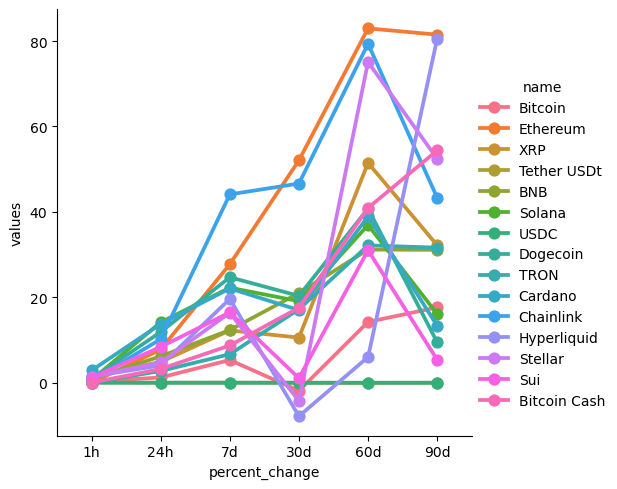

In [23]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [24]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,119976.26613,2025-08-13 14:43:26.722296
15,Bitcoin,120063.66080,2025-08-13 14:44:19.804463
30,Bitcoin,120063.66080,2025-08-13 14:45:20.622446
